# STUDENT RESULT PREDICTION USING LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/DWM_Project/Sturesult.csv')

In [5]:
print("Loading Data")
df

Loading Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
##Analysing the data

In [7]:
df.shape

(25, 2)

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [13]:
##From above analysis we came to know that there is no null value so no need to remove any outliers
##Lets do some analysis by visualization

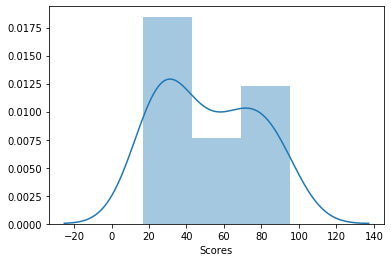

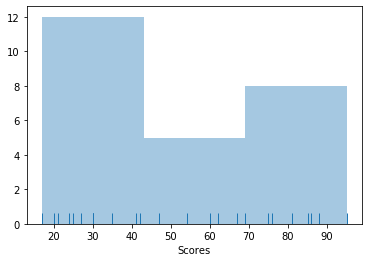

In [14]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

In [15]:
##Drawing a joint plot between scores and hours.

C:\Users\HP\anaconda4\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


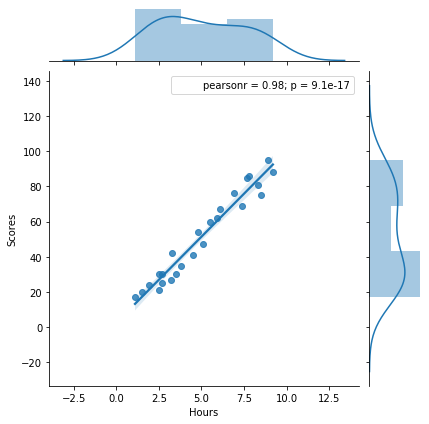

In [16]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

In [17]:
##Visualizing how much scores and hours are correlated to each other

Text(0.5, 1.0, 'Plotting the regression line')

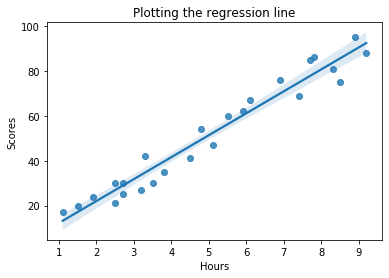

In [18]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("Plotting the regression line")

In [19]:
##From the above analysis we came to the conclusion that scores and hours are strongly correlated .
##Using Simple linear regression to predict the data as we only have two columns.

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)

y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [22]:
##Comparing Actual vs Predicted Value

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted_Score': y_pred})  
df1

,Actual,Predicted_Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [24]:
##Visualizing Actual scores and predected scores

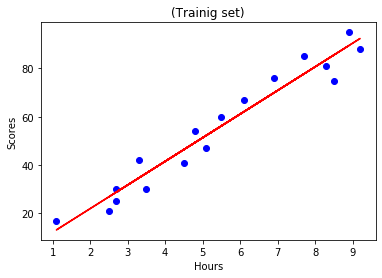

In [25]:
# PLotting the training set
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [26]:
##Calculating the coeffeciants of the simple linear regression equation: y = C0 + C1.x (C1: Is the Slope, C0:Is the Intercept)

In [27]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [28]:
B0 = mean_y - B1*mean_x

In [29]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [30]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

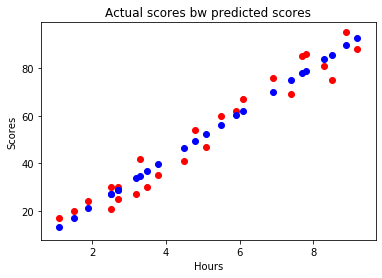

In [31]:
plt.scatter(df['Hours'], df['Scores'], c='red', label='Aactual Marks')
plt.scatter(df['Hours'], df['predicted_Scores'], c='blue', label='Predected Marks')
plt.title('Actual scores bw predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

In [32]:
y = B0 + B1*9.25
print("Marks scored by the student who study 9.25 hours a day is ",y)

Marks scored by the student who study 9.25 hours a day is  92.90985477015732


In [33]:
##Categorising the students who passed or failed .

In [34]:
# Lets the cut of be 40 marks
cut_off = 40

df['Result'] = df['Scores']>=40
df

,Hours,Scores,predicted_Scores,Result
0,2.5,21,26.923182,False
1,5.1,47,52.340271,True
2,3.2,27,33.766244,False
3,8.5,75,85.578002,True
4,3.5,30,36.698985,False
5,1.5,20,17.147378,False
6,9.2,88,92.421065,True
7,5.5,60,56.250592,True
8,8.3,81,83.622842,True
9,2.7,25,28.878343,False


In [35]:
df["Result"] = df["Result"].astype(str)

In [36]:
df.Result = df.Result.replace({"True": "Passed", "False": "Failed"})

In [37]:
df

,Hours,Scores,predicted_Scores,Result
0,2.5,21,26.923182,Failed
1,5.1,47,52.340271,Passed
2,3.2,27,33.766244,Failed
3,8.5,75,85.578002,Passed
4,3.5,30,36.698985,Failed
5,1.5,20,17.147378,Failed
6,9.2,88,92.421065,Passed
7,5.5,60,56.250592,Passed
8,8.3,81,83.622842,Passed
9,2.7,25,28.878343,Failed


In [38]:
df["Result"].value_counts()

Passed    15
Failed    10
Name: Result, dtype: int64

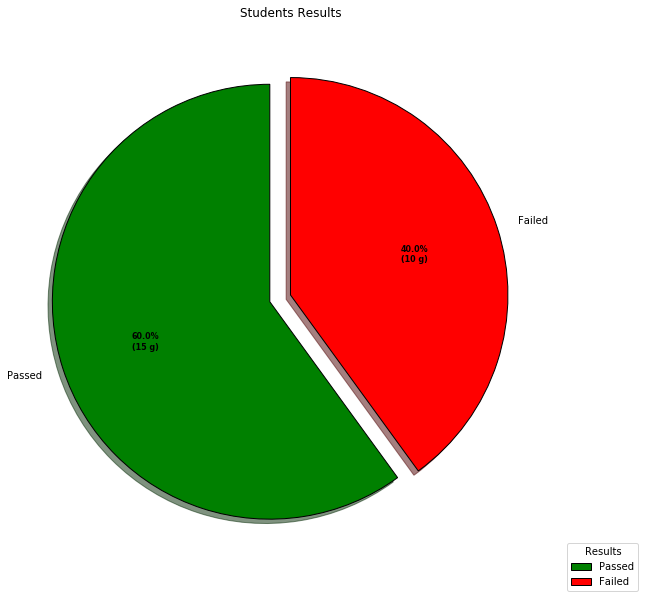

In [41]:
Results = ['Passed', 'Failed']
data = [15,10]
explode = (0.1, 0.0)
colors = ( "Green", "Red")


wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Results, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, Results, 
          title ="Results", 
          loc ="center left", 
          bbox_to_anchor =(1, 0)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Students Results") 
  
# show plot 
plt.show()

In [ ]:
#So by our analysis we came to the conclusion that 60% of the students passed while 40% failed